<a href="https://colab.research.google.com/github/allielabrecque4-debug/Machine-Learning-Labrecque/blob/main/ML_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Machine Learning Homework 2
Allie Labrecque
662017931

In [5]:
#Question 1

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

# define new features
feature1 = X[:, 0] * X[:, 1]      # product of feature 1 and 2
feature2 = X[:, 2] / X[:, 3]      # ratio of feature 3 to 4

# Stack new features into a new dataset
X_new = np.column_stack((feature1, feature2))

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)


clf = svm.SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)


acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[1 1 1 1 0 2 2 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.9666666666666667


Accuracy on even digits: 0.996268656716418
0.996268656716418
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        46
           4       1.00      0.98      0.99        51
           6       1.00      1.00      1.00        50
           8       0.98      1.00      0.99        64

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



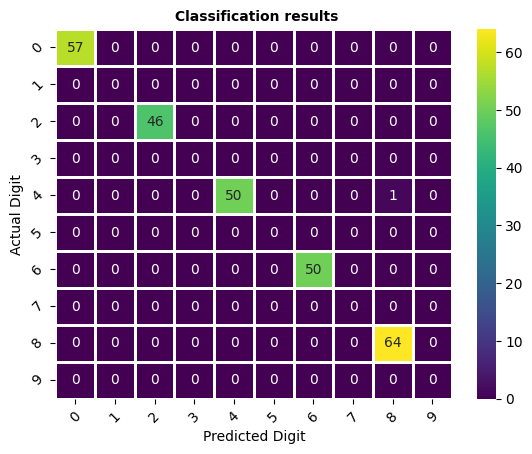

In [7]:
# Question 2
import numpy as np
from collections import Counter
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()

X = digits.data
y = digits.target

even_check = y % 2 == 0
X_even = X[even_check]
y_even = y[even_check]

X_train, X_test, y_train, y_test = train_test_split(X_even, y_even, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on even digits:", acc)

model = knn
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))

# Create a full 10x10 confusion matrix
cm_full = np.zeros((10, 10), dtype=int)

# Get the unique even digits present in y_test and preds
unique_even_digits = sorted(np.unique(np.concatenate((y_test, preds))))

# Create the confusion matrix for the even digits
cm_even = confusion_matrix(y_test, preds, labels=unique_even_digits)

# Map the even digit confusion matrix values to the full confusion matrix
for i, actual_digit in enumerate(unique_even_digits):
    for j, predicted_digit in enumerate(unique_even_digits):
        cm_full[actual_digit, predicted_digit] = cm_even[i, j]


ax = sns.heatmap(cm_full,linewidths=2, annot=True, cmap='viridis', cbar=True, fmt='d');

# Set the tick locations to match the number of classes (0-9)
ax.set_xticks(np.arange(len(digits.target_names)) + 0.5)
ax.set_yticks(np.arange(len(digits.target_names)) + 0.5)

ax.set_xticklabels(digits.target_names);
ax.set_yticklabels(digits.target_names);
plt.xlabel('Predicted Digit');
plt.ylabel('Actual Digit');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results', fontsize='medium', fontweight='bold');
print(classification_report(y_test, model.predict(X_test)))

The model correctly indentified 50 number 6's

['train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'test', 'test', 'test', 'test', 'train', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train'

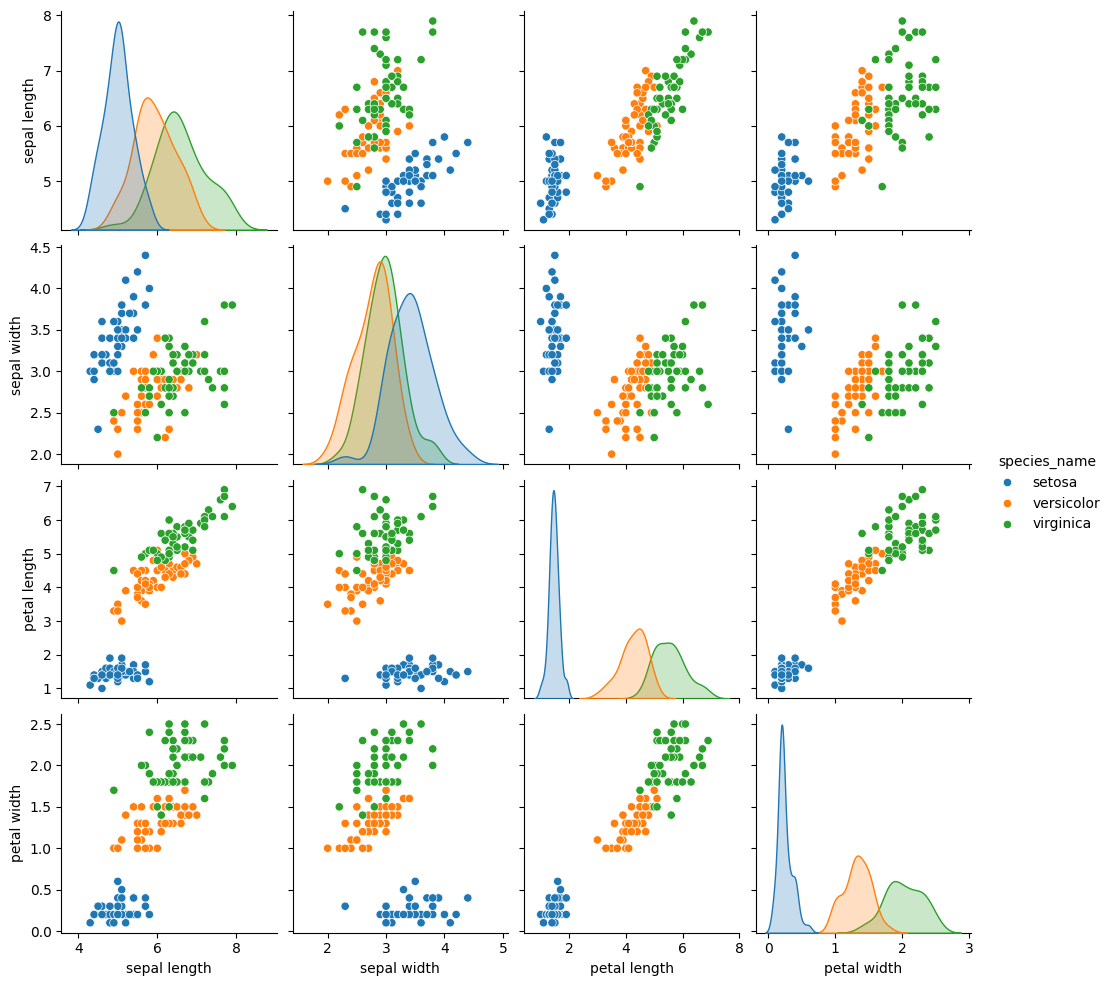

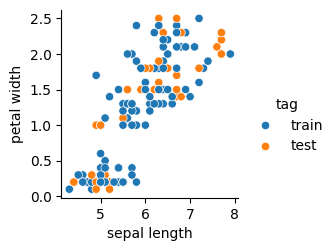

In [2]:
# Question 3: k-means from class algorithim and scikit algorithim
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SKMeans

data = load_iris()

df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]

# Select the first three features for KMeans
X = df[['sepal length', 'sepal width', 'petal length']].to_numpy() # These are our features

df['target'] = data['target']

named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])

df['species_name'] = named_targets

# sns.pairplot(df, hue='target')
sns.pairplot(df.drop(labels=['target'],axis=1), hue='species_name')

from sklearn.model_selection import train_test_split

y = df['target'].to_numpy()

X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

# tag points with train or test labels

tag = []

for _ in range(X.shape[0]):
    if _ in idx_train:
        tag.append('train')
    else:
        tag.append('test')

print(tag)
df['tag'] = tag

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='tag')

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]


# my Kmeans method
my_kmeans_model = KMeans(k=3)
my_kmeans_model.fit(X_train)
my_kmeans_labels = my_kmeans_model.predict(X_test)
my_cluster_coords = my_kmeans_model.centroids
print('My KMeans predicted_labels:', my_kmeans_labels)
print('My KMeans cluster centroids:', my_cluster_coords)


# Scikit Kmeans
sklearn_kmeans_model = SKMeans(n_clusters=3, random_state=123, n_init=10)
sklearn_kmeans_model.fit(X_train)
sklearn_kmeans_labels = sklearn_kmeans_model.predict(X_test)
sklearn_cluster_coords = sklearn_kmeans_model.cluster_centers_
print('Scikit-learn KMeans predicted_labels:', sklearn_kmeans_labels)
print('Scikit-learn KMeans cluster centroids:', sklearn_cluster_coords)

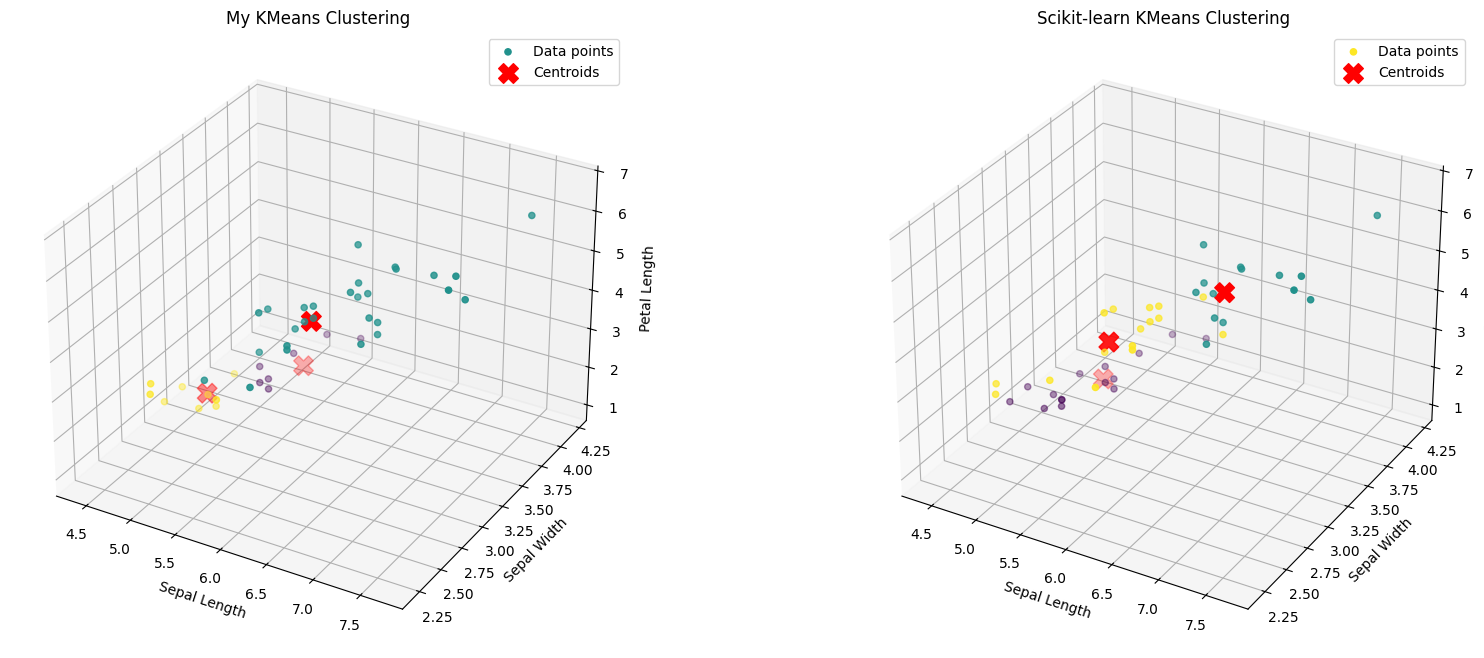

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig, axes = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': '3d'})

# Plot for My KMeans
axes[0].scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=my_kmeans_labels, cmap='viridis', marker='o', label='Data points')
axes[0].scatter(my_cluster_coords[:, 0], my_cluster_coords[:, 1], my_cluster_coords[:, 2], c='red', marker='X', s=200, label='Centroids')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_zlabel('Petal Length')
axes[0].set_title('My KMeans Clustering')
axes[0].legend()

# Plot for Scikit-learn KMeans
axes[1].scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=sklearn_kmeans_labels, cmap='viridis', marker='o', label='Data points')
axes[1].scatter(sklearn_cluster_coords[:, 0], sklearn_cluster_coords[:, 1], sklearn_cluster_coords[:, 2], c='red', marker='X', s=200, label='Centroids')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_zlabel('Petal Length')
axes[1].set_title('Scikit KMeans Clustering')
axes[1].legend()

plt.show()

My KMeans predicted_labels: [1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1]
My KMeans cluster centroids: [[5.04444444 3.40833333 1.53055556]
 [6.22318841 2.84927536 4.88695652]]
Scikit-learn KMeans predicted_labels: [1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1]
Scikit-learn KMeans cluster centroids: [[5.04444444 3.40833333 1.53055556]
 [6.22318841 2.84927536 4.88695652]]


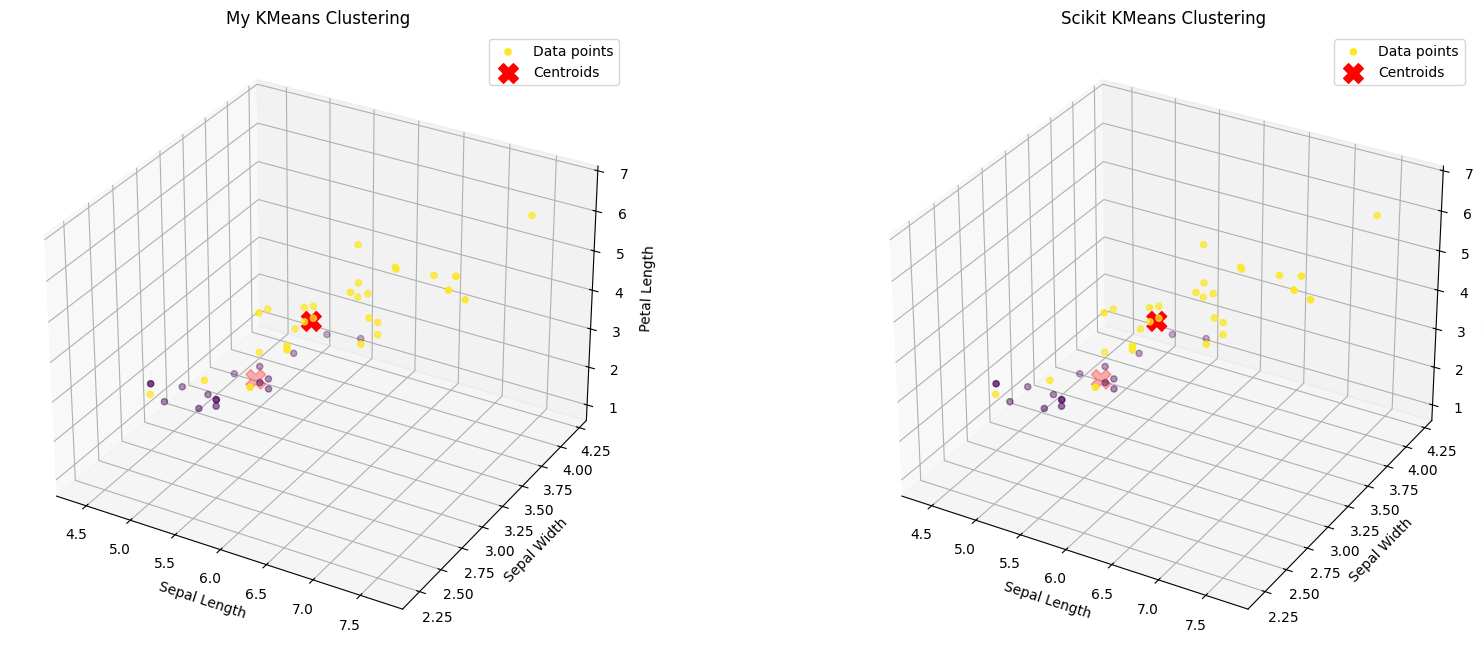

In [5]:
# vary the number of clusters, k = 3 to k = 2
# my Kmeans method
my_kmeans_model = KMeans(k=2)
my_kmeans_model.fit(X_train)
my_kmeans_labels = my_kmeans_model.predict(X_test)
my_cluster_coords = my_kmeans_model.centroids
print('My KMeans predicted_labels:', my_kmeans_labels)
print('My KMeans cluster centroids:', my_cluster_coords)


# Scikit Kmeans
sklearn_kmeans_model = SKMeans(n_clusters=2, random_state=123, n_init=10)
sklearn_kmeans_model.fit(X_train)
sklearn_kmeans_labels = sklearn_kmeans_model.predict(X_test)
sklearn_cluster_coords = sklearn_kmeans_model.cluster_centers_
print('Scikit-learn KMeans predicted_labels:', sklearn_kmeans_labels)
print('Scikit-learn KMeans cluster centroids:', sklearn_cluster_coords)

from mpl_toolkits.mplot3d import Axes3D

fig, axes = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': '3d'})

# Plot for My KMeans
axes[0].scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=my_kmeans_labels, cmap='viridis', marker='o', label='Data points')
axes[0].scatter(my_cluster_coords[:, 0], my_cluster_coords[:, 1], my_cluster_coords[:, 2], c='red', marker='X', s=200, label='Centroids')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_zlabel('Petal Length')
axes[0].set_title('My KMeans Clustering')
axes[0].legend()

# Plot for Scikit-learn KMeans
axes[1].scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=sklearn_kmeans_labels, cmap='viridis', marker='o', label='Data points')
axes[1].scatter(sklearn_cluster_coords[:, 0], sklearn_cluster_coords[:, 1], sklearn_cluster_coords[:, 2], c='red', marker='X', s=200, label='Centroids')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_zlabel('Petal Length')
axes[1].set_title('Scikit KMeans Clustering')
axes[1].legend()

plt.show()

My KMeans predicted_labels: [4 0 1 3 0 2 2 3 2 2 0 2 4 2 3 2 4 4 2 2 2 2 2 3 2 3 4 2 3 0 0 0 4 1 1 1 4
 3 4 2 0 1 1 0 3]
My KMeans cluster centroids: [[7.07142857 3.06428571 5.92857143]
 [5.56363636 2.62727273 4.00909091]
 [5.04285714 3.43428571 1.48857143]
 [6.43571429 2.95       4.59285714]
 [6.15       2.855      5.235     ]]
Scikit-learn KMeans predicted_labels: [3 4 2 3 4 0 0 3 0 0 4 0 1 0 3 0 3 3 0 0 0 0 0 3 0 3 1 0 3 1 1 1 3 2 2 2 3
 1 1 0 4 2 3 4 3]
Scikit-learn KMeans cluster centroids: [[5.04285714 3.43428571 1.48857143]
 [6.585      3.015      5.44      ]
 [5.55714286 2.61904762 3.98571429]
 [6.10454545 2.82272727 4.73636364]
 [7.4        3.1        6.21428571]]


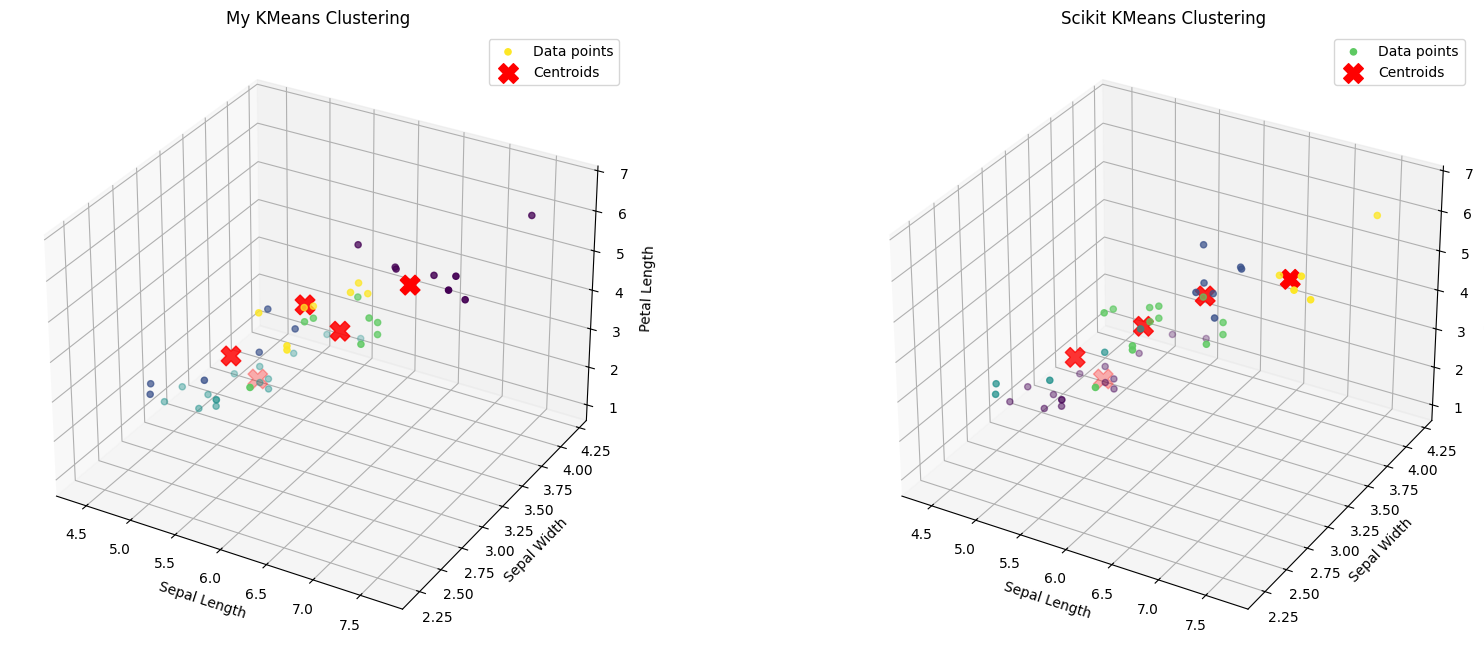

In [6]:
# vary the number of clusters, k = 3 to k = 5
# my Kmeans method
my_kmeans_model = KMeans(k=5)
my_kmeans_model.fit(X_train)
my_kmeans_labels = my_kmeans_model.predict(X_test)
my_cluster_coords = my_kmeans_model.centroids
print('My KMeans predicted_labels:', my_kmeans_labels)
print('My KMeans cluster centroids:', my_cluster_coords)


# Scikit Kmeans
sklearn_kmeans_model = SKMeans(n_clusters=5, random_state=123, n_init=10)
sklearn_kmeans_model.fit(X_train)
sklearn_kmeans_labels = sklearn_kmeans_model.predict(X_test)
sklearn_cluster_coords = sklearn_kmeans_model.cluster_centers_
print('Scikit-learn KMeans predicted_labels:', sklearn_kmeans_labels)
print('Scikit-learn KMeans cluster centroids:', sklearn_cluster_coords)

from mpl_toolkits.mplot3d import Axes3D

fig, axes = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': '3d'})

# Plot for My KMeans
axes[0].scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=my_kmeans_labels, cmap='viridis', marker='o', label='Data points')
axes[0].scatter(my_cluster_coords[:, 0], my_cluster_coords[:, 1], my_cluster_coords[:, 2], c='red', marker='X', s=200, label='Centroids')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_zlabel('Petal Length')
axes[0].set_title('My KMeans Clustering')
axes[0].legend()

# Plot for Scikit-learn KMeans
axes[1].scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=sklearn_kmeans_labels, cmap='viridis', marker='o', label='Data points')
axes[1].scatter(sklearn_cluster_coords[:, 0], sklearn_cluster_coords[:, 1], sklearn_cluster_coords[:, 2], c='red', marker='X', s=200, label='Centroids')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_zlabel('Petal Length')
axes[1].set_title('Scikit KMeans Clustering')
axes[1].legend()

plt.show()

When the number of clusters is changed from 3 to 2, the two species that have the most in common appear to be grouped together, falsely identifying them as the same species. When the number of clusters is changed from 3 to 5, irises of the same species are wrongly grouped separately. This demonstrates the importance of selecting the right number of clusters based on the data.